<a href="https://colab.research.google.com/github/mokshmahajan2004/Deep-Learning-Assignments/blob/main/Assignment_1_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Name: **Moksh Mahajan**  

Roll No: **102206084**

Subgroup: **4F1C**


Python Exercises & Analysis

This notebook covers:

1) Gradient Descent on \(f(x)=4x^2-3x+8\) with plotting and computed minimum  
2) Array manipulations and random bytes data  
3) Revenue–Expense analysis with profit, tax, margins, and monthly diagnostics  
4) NBA 2014–2015 player stats analysis and plots

**Note:** Plots use matplotlib (no seaborn), and each chart is a single figure as requested.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Make numpy printing nicer
np.set_printoptions(precision=3, suppress=True)


 1) Gradient Descent for \(f(x)=4x^2-3x+8\)
 - \(f(x) = 4x^2-3x+8\)  
 - \(f'(x) = 8x-3\)  
 We'll run gradient descent from a few starting points to show convergence and also compute the closed-form minimum \(x^\*=\frac{3}{8}=0.375\).


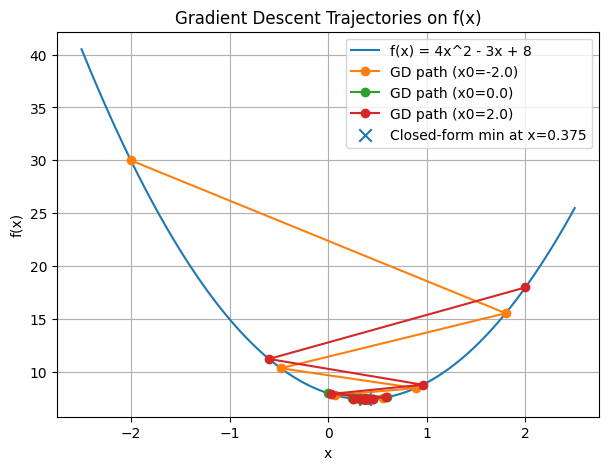

(0.375, 7.4375, np.float64(0.3750010661358011), np.float64(7.437500000004547))

In [ ]:
def f(x):
    return 4*x**2 - 3*x + 8

def grad(x):
    return 8*x - 3

def gradient_descent(x0, lr=0.1, steps=50):
    xs = [x0]
    for _ in range(steps):
        x0 = x0 - lr * grad(x0)
        xs.append(x0)
    return np.array(xs), f(np.array(xs))

inits = [ -2.0, 0.0, 2.0 ]
histories = [gradient_descent(x0, lr=0.2, steps=25) for x0 in inits]  # stable lr

xmin_closed = 3/8
fmin_closed = f(xmin_closed)

# Plot f(x) and the GD paths
xs = np.linspace(-2.5, 2.5, 400)
ys = f(xs)

plt.figure(figsize=(7,5))
plt.plot(xs, ys, label="f(x) = 4x^2 - 3x + 8")
for (xh, yh), x0 in zip(histories, inits):
    plt.plot(xh, f(xh), marker='o', linestyle='-', label=f'GD path (x0={x0})')
plt.scatter([xmin_closed], [fmin_closed], marker='x', s=80, label=f'Closed-form min at x={xmin_closed:.3f}')
plt.title("Gradient Descent Trajectories on f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# Also show the final GD estimate from a representative run
gd_xs, gd_fs = histories[1]
gd_x_min = gd_xs[-1]
gd_f_min = gd_fs[-1]

xmin_closed, fmin_closed, gd_x_min, gd_f_min


2) Array tasks
 a) Generate 100 points between 31 and 75  
 b) Using a **for loop**, for each **odd-indexed** element (0-based indices 1,3,5,...) do: **add 3 and multiply by 0.4** (i.e., `val = (val + 3) * 0.4`)  
 c) Generate an array of **random 20 bytes** data


In [ ]:

# a) 100 points between 31 and 75 (inclusive endpoints with linspace)
arr = np.linspace(31, 75, 100)
arr_before = arr.copy()

# b) modify odd indices with a for loop
for i in range(1, len(arr), 2):  # odd indices in 0-based indexing
    arr[i] = (arr[i] + 3) * 0.4

# c) 20 random bytes -> show both raw bytes and as uint8 array
raw_bytes = np.random.bytes(20)
bytes_array = np.frombuffer(raw_bytes, dtype=np.uint8)

arr[:10], arr_before[:10], bytes_array


(array([31.   , 13.778, 31.889, 14.133, 32.778, 14.489, 33.667, 14.844,
        34.556, 15.2  ]),
 array([31.   , 31.444, 31.889, 32.333, 32.778, 33.222, 33.667, 34.111,
        34.556, 35.   ]),
 array([127, 107, 219, 200, 244,   1,  46, 252, 203, 184,  95, 220, 243,
        178, 141, 122, 144, 147,  24,  40], dtype=uint8))


3) Revenue vs Expenses analysis (15 months)
 - Revenue: 15 random integers between 10K and 50K  
 - Expenses: 15 random integers between 9K and 27K  
 - Profit = Revenue − Expenses  
 - Tax = 0.3 × Revenue  
 - \(P = \text{Profit} - \text{Tax}\)  
 - Margin \(= 100 \times P/\text{Revenue}\)  
 - Good months: \(P > \text{mean}(P)\)  
 - Bad months: \(P < \text{mean}(P)\)  
 - Worst month: month with minimum \(P\)

,Month,Revenue,Expenses,Profit,Tax(30%),P (Profit - Tax),Margin %,GoodMonth,BadMonth
0,1,13570,23149,-9579,4071.0,-13650.0,-100.59,False,True
1,2,40959,18238,22721,12287.7,10433.3,25.47,True,False
2,3,36183,11306,24877,10854.9,14022.1,38.75,True,False
3,4,27555,24116,3439,8266.5,-4827.5,-17.52,False,True
4,5,27321,17107,10214,8196.3,2017.7,7.39,False,True
5,6,44344,18006,26338,13303.2,13034.8,29.39,True,False
6,7,13437,15674,-2237,4031.1,-6268.1,-46.65,False,True
7,8,37895,12286,25609,11368.5,14240.5,37.58,True,False
8,9,18058,25682,-7624,5417.4,-13041.4,-72.22,False,True
9,10,13767,23068,-9301,4130.1,-13431.1,-97.56,False,True


Summary: {'Mean P': 3009.97, 'Best Month (1-based)': 12, 'Best Month P': 18074.5, 'Worst Month (1-based)': 1, 'Worst Month P': -13650.0, 'Good Months (labels)': [2, 3, 6, 8, 12, 13, 14, 15], 'Bad Months (labels)': [1, 4, 5, 7, 9, 10, 11]}


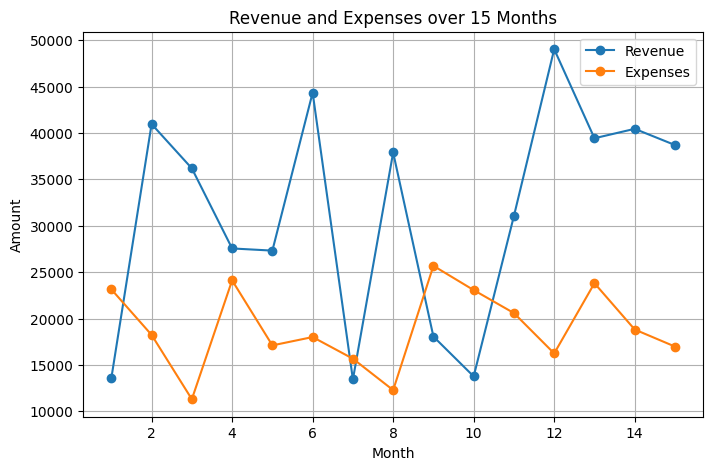

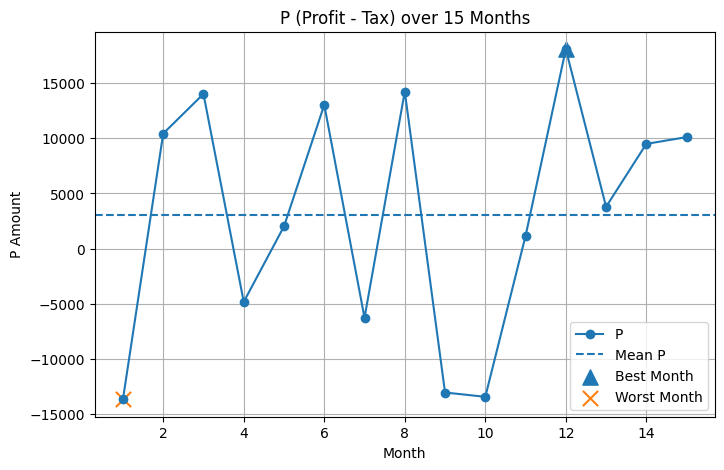

In [ ]:


# --- Data generation ---
rng = np.random.default_rng(42)
Revenue  = rng.integers(10_000, 50_001, size=15)
Expenses = rng.integers(9_000, 27_001, size=15)

# --- Metrics ---
Profit = Revenue - Expenses
Tax    = 0.3 * Revenue
P      = Profit - Tax
Margin = (P / Revenue) * 100

mean_P = P.mean()
good_months_mask = P > mean_P
bad_months_mask  = P < mean_P

worst_month_idx  = int(np.argmin(P))  # 0-based
best_month_idx   = int(np.argmax(P))
worst_month_lbl  = worst_month_idx + 1
best_month_lbl   = best_month_idx + 1

# --- Table ---
df_fin = pd.DataFrame({
    "Month": np.arange(1, 16),
    "Revenue": Revenue,
    "Expenses": Expenses,
    "Profit": Profit,
    "Tax(30%)": Tax.round(2),
    "P (Profit - Tax)": P.round(2),
    "Margin %": Margin.round(2),
    "GoodMonth": good_months_mask,
    "BadMonth": bad_months_mask
})

# Show table
display(df_fin)

# --- Summary ---
summary_fin = {
    "Mean P": round(float(mean_P), 2),
    "Best Month (1-based)": best_month_lbl,
    "Best Month P": round(float(P[best_month_idx]), 2),
    "Worst Month (1-based)": worst_month_lbl,
    "Worst Month P": round(float(P[worst_month_idx]), 2),
    "Good Months (labels)": [int(m) for m in df_fin.loc[good_months_mask, "Month"]],
    "Bad Months (labels)":  [int(m) for m in df_fin.loc[bad_months_mask,  "Month"]],
}
print("Summary:", summary_fin)

# --- Plots ---
plt.figure(figsize=(8,5))
plt.plot(df_fin["Month"], df_fin["Revenue"], marker='o', label="Revenue")
plt.plot(df_fin["Month"], df_fin["Expenses"], marker='o', label="Expenses")
plt.title("Revenue and Expenses over 15 Months")
plt.xlabel("Month")
plt.ylabel("Amount")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(df_fin["Month"], df_fin["P (Profit - Tax)"], marker='o', label="P")
plt.axhline(mean_P, linestyle='--', label="Mean P")
plt.scatter([best_month_lbl],  [P[best_month_idx]],  marker='^', s=120, label="Best Month")
plt.scatter([worst_month_lbl], [P[worst_month_idx]], marker='x', s=120, label="Worst Month")
plt.title("P (Profit - Tax) over 15 Months")
plt.xlabel("Month")
plt.ylabel("P Amount")
plt.grid(True)
plt.legend()
plt.show()



4) NBA 2014–2015 Dataset Analysis
 Using the uploaded file `players_stats.csv` (from the Kaggle link).  
 We'll load it, clean the relevant fields, and create the requested plots:
 - Games played vs Points earned
 - Points earned vs Height and vs Weight
 - Plus: a small "unique" analysis (simple correlations and a quick leaderboard)


,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661


Detected columns: {'games': 'Games Played', 'points': 'PTS', 'height': 'Height', 'weight': 'Weight'}


,Player,Team,Games,Points,Height,Weight
0,<NA>,PHO,26,133,185.0,81.45
1,<NA>,CHI,82,954,180.0,72.45
2,<NA>,ORL,47,243,202.5,99.00
3,<NA>,ATL,32,213,205.0,106.65
4,<NA>,ATL,76,1156,205.0,110.25
5,<NA>,CHA,65,1082,205.0,130.05
6,<NA>,NJN,74,545,195.0,99.00
7,<NA>,UTA,27,374,195.0,96.30
8,<NA>,CLE,5,4,210.0,110.25
9,<NA>,PHO,69,432,212.5,117.00


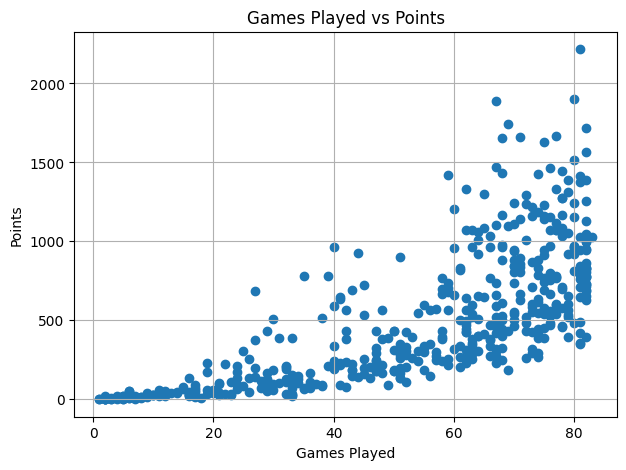

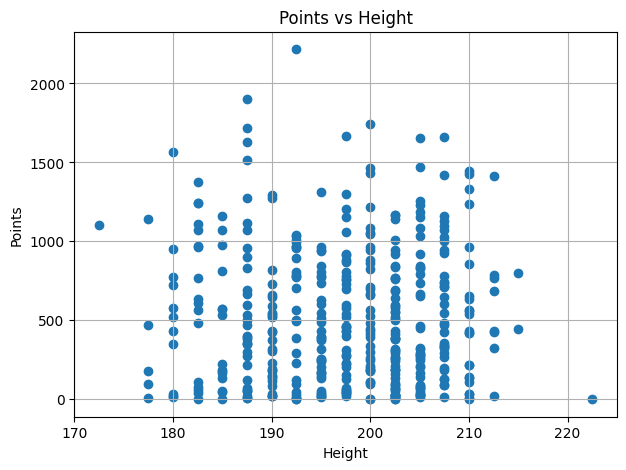

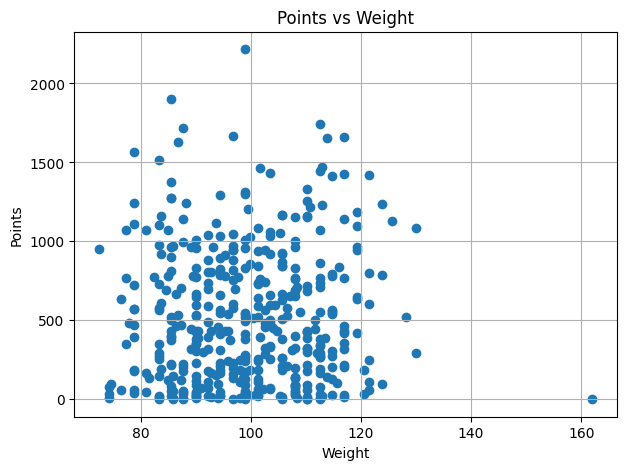

Correlation matrix:


,Games,Points,Height,Weight
Games,1.000000,0.725876,0.068284,0.080360
Points,0.725876,1.000000,-0.016891,0.030831
Height,0.068284,-0.016891,1.000000,0.843514
Weight,0.080360,0.030831,0.843514,1.000000


Top 10 by 'Points' (interpreted as total points if available):


,Player,Team,Games,Points,Height,Weight
194,<NA>,HOU,81,2217,192.5,99.00
433,<NA>,GSW,80,1900,187.5,85.50
409,<NA>,NaN,67,1886,NaN,NaN
301,<NA>,CLE,69,1743,200.0,112.50
91,<NA>,POR,82,1720,187.5,87.75
281,<NA>,GSW,77,1668,197.5,96.75
292,<NA>,POR,71,1661,207.5,117.00
29,<NA>,NOH,68,1656,205.0,113.85
291,<NA>,CLE,75,1628,187.5,86.85
76,<NA>,LAC,82,1564,180.0,78.75


Top 10 by Points Per Game (PPG) (derived if both Points & Games available):


,Player,Team,Games,PPG,Points
409,<NA>,NaN,67,28.149254,1886
194,<NA>,HOU,81,27.370370,2217
273,<NA>,OKC,27,25.407407,686
301,<NA>,CLE,69,25.260870,1743
29,<NA>,NOH,68,24.352941,1656
63,<NA>,NYK,40,24.150000,966
109,<NA>,SAC,59,24.084746,1421
433,<NA>,GSW,80,23.750000,1900
292,<NA>,POR,71,23.394366,1661
282,<NA>,LAL,35,22.342857,782


In [ ]:

# ---------- 1) Load CSV with a robust path fallback ----------
candidates = [Path("/content/drive/MyDrive/players_stats.csv")]
csv_path = next((p for p in candidates if p.exists()), None)
if csv_path is None:
    raise FileNotFoundError("players_stats.csv not found. Place it in the working directory or /mnt/data/")

nba = pd.read_csv(csv_path)
display(nba.head(3))

# ---------- 2) Detect likely columns for games/points/height/weight ----------
col_map = {}

def find_col(cands):
    for c in cands:
        if c in nba.columns:
            return c
    return None

col_map["games"]  = find_col(["G", "Games Played", "GP", "games", "games_played"])
col_map["points"] = find_col(["PTS", "Points", "points", "PTS_per_game", "pts_per_game", "points_per_game", "PPG"])
col_map["height"] = find_col(["height", "Height", "height(cm)", "height_cm", "Ht", "Height_cm"])
col_map["weight"] = find_col(["weight", "Weight", "weight(kg)", "weight_kg", "Wt", "Weight_kg"])

# Also pick common ID columns if present
player_col = "Player" if "Player" in nba.columns else None
team_col   = "Tm" if "Tm" in nba.columns else ("Team" if "Team" in nba.columns else None)

print("Detected columns:", col_map)

# ---------- 3) Helpers for coercion, including optional height parser ----------
def coerce_numeric(s):
    return pd.to_numeric(s, errors="coerce") if s is not None else pd.Series([pd.NA]*len(nba))

def parse_height_ft_in(series):
    """
    If height is like '6-7' (feet-inches) or "6'7\"" convert to centimeters.
    Returns numeric cm; non-matching values -> NaN.
    """
    if series is None:
        return pd.Series([pd.NA]*len(nba), dtype="float64")
    ser = nba[series].astype(str)

    def to_cm(val):
        v = val.strip()
        # Accept 6-7, 6'7, 6'7", 6 ft 7 in
        if "-" in v:
            parts = v.split("-")
        elif "'" in v:
            parts = v.replace('"', "").split("'")
        elif "ft" in v:
            parts = v.replace("in", "").replace("ft", "").split()
        else:
            return np.nan
        try:
            ft = float(parts[0])
            inch = float(parts[1]) if len(parts) > 1 else 0.0
            return ft*30.48 + inch*2.54
        except:
            return np.nan

    cm = ser.map(to_cm)
    return pd.to_numeric(cm, errors="coerce")

# ---------- 4) Build working DataFrame with best-effort numeric fields ----------
games  = coerce_numeric(nba.get(col_map["games"]))   if col_map["games"]  else pd.Series([pd.NA]*len(nba))
points = coerce_numeric(nba.get(col_map["points"]))  if col_map["points"] else pd.Series([pd.NA]*len(nba))

# Height: try numeric first; if mostly NaN and strings look like ft-in, try parser
height_raw = nba.get(col_map["height"]) if col_map["height"] else None
height_num = coerce_numeric(height_raw)
if height_raw is not None and height_num.isna().mean() > 0.8:
    height_num = parse_height_ft_in(col_map["height"])

# Weight: try numeric; (optional) if looks like lbs with text, strip text
weight_raw = nba.get(col_map["weight"]) if col_map["weight"] else None
if weight_raw is not None:
    # Remove common text like 'lbs', 'kg'
    weight_clean = weight_raw.astype(str).str.replace(r"[^\d\.]", "", regex=True)
    weight_num = pd.to_numeric(weight_clean, errors="coerce")
else:
    weight_num = pd.Series([pd.NA]*len(nba))

work = pd.DataFrame({
    "Player": nba[player_col] if player_col else pd.Series([pd.NA]*len(nba), dtype=object),
    "Team":   nba[team_col]   if team_col   else pd.Series([pd.NA]*len(nba), dtype=object),
    "Games":  games,
    "Points": points,
    "Height": height_num,
    "Weight": weight_num
})

# Drop rows missing either Games or Points
work = work.dropna(subset=["Games", "Points"]).reset_index(drop=True)

display(work.head(10))

# ---------- 5) Plots ----------
# Plot 1: Games played vs Points
plt.figure(figsize=(7,5))
plt.scatter(work["Games"], work["Points"])
plt.title("Games Played vs Points")
plt.xlabel("Games Played")
plt.ylabel("Points")
plt.grid(True)
plt.show()

# Plot 2a: Points vs Height (if available)
if work["Height"].notna().sum() > 0:
    plt.figure(figsize=(7,5))
    plt.scatter(work["Height"], work["Points"])
    plt.title("Points vs Height")
    plt.xlabel("Height")
    plt.ylabel("Points")
    plt.grid(True)
    plt.show()

# Plot 2b: Points vs Weight (if available)
if work["Weight"].notna().sum() > 0:
    plt.figure(figsize=(7,5))
    plt.scatter(work["Weight"], work["Points"])
    plt.title("Points vs Weight")
    plt.xlabel("Weight")
    plt.ylabel("Points")
    plt.grid(True)
    plt.show()

# ---------- 6) Unique quick analysis ----------
# a) Correlations among numeric fields
corr = work[["Games", "Points", "Height", "Weight"]].dropna().corr(method="pearson")
print("Correlation matrix:")
display(corr)

# b) If 'Points' looks like totals, add a quick PPG (defensive: only if Games>0)
if (work["Games"] > 0).any():
    work["PPG"] = work["Points"] / work["Games"].replace(0, pd.NA)
else:
    work["PPG"] = pd.NA

# c) Leaderboards
top10_points = work.sort_values("Points", ascending=False).head(10)[["Player","Team","Games","Points","Height","Weight"]]
top10_ppg    = work.dropna(subset=["PPG"]).sort_values("PPG", ascending=False).head(10)[["Player","Team","Games","PPG","Points"]]

print("Top 10 by 'Points' (interpreted as total points if available):")
display(top10_points)

print("Top 10 by Points Per Game (PPG) (derived if both Points & Games available):")
display(top10_ppg)
